<a href="https://colab.research.google.com/github/aiishaa/Arabic-Dialect-Classification/blob/main/DeepLearning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import base64
import tensorflow as tf
import pandas as pd
import numpy as np
import codecs

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
global str

url = "https://recruitment.aimtechnologies.co/ai-tasks"
headers = {
  'Content-Type': 'application/json'
}

#payload="[1055620304465215616\", \"1057418989293485952\"]"
payload="[\"1055620304465215616\"]"
response = requests.post(url, headers=headers, data=payload)
print(response.text)

payload="[\"1057418989293485952\"]"
response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)

print(response)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dialect_dataset.csv')
nrows = len(df)
sample_size = 5000
df = df.groupby('dialect').apply(lambda x: x.sample(sample_size))
print(len(df))

random_df = df.sample(frac=1)
id = random_df["id"].to_numpy()
print(len(random_df))
dialect = random_df["dialect"].to_numpy()
print(dialect)
print(random_df['dialect'])


data_classes = (df['dialect'].unique())
encoded_data, mapping_index = pd.Series(data_classes).factorize()
print(mapping_index)
print(encoded_data)
random_df['dialect'].replace(mapping_index,
                        encoded_data, inplace=True)
print(random_df['dialect'])
dialect = random_df["dialect"].to_numpy()
print(dialect)

90000
90000
['SY' 'TN' 'BH' ... 'SA' 'JO' 'AE']
dialect        
SY       137044    SY
TN       149031    TN
BH       443136    BH
PL       92285     PL
SA       210551    SA
                   ..
EG       271613    EG
PL       94720     PL
SA       200111    SA
JO       158616    JO
AE       417248    AE
Name: dialect, Length: 90000, dtype: object
Index(['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM', 'PL',
       'QA', 'SA', 'SD', 'SY', 'TN', 'YE'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
dialect        
SY       137044    15
TN       149031    16
BH       443136     1
PL       92285     11
SA       210551    13
                   ..
EG       271613     3
PL       94720     11
SA       200111    13
JO       158616     5
AE       417248     0
Name: dialect, Length: 90000, dtype: int64
[15 16  1 ... 13  5  0]


In [ ]:
import requests
import json
import base64
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/dialect_dataset.csv')
i = 0
dict = [{}]
while i in range (90000):
  Payload = []
  ids = id[i:i+1000]
  #print(i)
  for ID in ids:
    temp = str(ID)
    temp = '"{}"'.format(temp)
    #temp = '['+temp+']'
    Payload.append(temp)

  # Printing list using translate Method ( a list without single quotes)
  translation = {39: None}
  Payload = str(Payload).translate(translation)
  response = requests.post( url, headers=headers, data=Payload)
  #print(response.json())
  #print(response.status_code)
  dict.append(response.json())
  i+=1000
print(len(dict))

In [ ]:
from collections import defaultdict
print(dict[1])
print(len(dict))
# dictionary and list comprehension 
# for shorthand to solution of problem
res = defaultdict(list)
print(len(res))
{res[key].append(sub[key]) for sub in dict for key in sub} 
print(len(res)) 

In [ ]:
import re
import string
import nltk
nltk.download("punkt")
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def tokenize(strr):
  a_list = nltk.word_tokenize(strr)
  return a_list

# printing result 
#strr = str(res["554714777931350016"])
#print(tokenize(strr))

In [ ]:
#run check that the stemmer works
import nltk
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
ar_stemmer.stemWord("فسميتموها") #exmaple to check that it works

'سمي'

In [ ]:
import unicodedata
def preprocess(sentence):
    result = []
    output = re.sub(r'[0-9A-Za-z\\؟]', ' ' , sentence)
    output = output.rstrip()

    # Normalize unicode encoding
    output = unicodedata.normalize('NFC', output)

    # Remove '@name'
    output = re.sub(r'(@.*?)[\s]', ' ', output)

    # remove emojis
    output =  deEmojify(output)

    # Remove special characters from the string
    pattern = r'[' + string.punctuation + ']'
    output = re.sub(pattern, ' ', output)

    # Remove URLs
    output = re.sub(r'http\S+', ' ', output)

    # Remove trailing whitespace and new lines
    output = re.sub(r'\s+', ' ', output).strip()
    output = output.replace('\\n', ' ').replace('\n', '')

    # tokenize the sentence
    result.append(output)
    return result


In [ ]:
!pip install pyarabic
from nltk.corpus import stopwords
import pyarabic.araby as araby
import nltk
nltk.download("stopwords") #arabic stopwords are not biult-in, so we find them by calling a set object
stopwords_list = stopwords.words('arabic')

     |████████████████████████████████| 126 kB 5.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['عمان برمضان ماخذين طور القذافي عيدهم كله غير']


In [ ]:
sentences = []
for key in res:
  strr = str(res[str(key)])
  sentences.append(strr)

random_df['text'] = sentences
print(random_df['text'])

dialect        
SY       137044       ['قال شوووو قربت ..بس الهيئه قربت لبعيد اكتر']
TN       149031    ['فما قرارات في حياتك كيف انت تبطى برشا باش تأ...
BH       443136    ['أحس سناب جات بترد تحصل أرباح فقط من إعلانات ...
PL       92285     ['@Lujainmah0321 ههههه الله يزيدك حماس.. لا وا...
SA       210551         ['@Souhair_Alqaisi وقت الكسره وش نعرف؟\n🤒😂']
                                         ...                        
EG       271613    ['قالوا ليّ زمان وانا صغير، مافيش انسان بيتغير...
PL       94720     ['التريند اللي بعد تريند مين قتل فريده\n\n=طلع...
SA       200111    ['@r8k44_ @hureyaksa اقول فارق بالله خرا عليك ...
JO       158616    ['@NartNm @9jgf76 @amjaad0o0 @dayyat23 @AboRas...
AE       417248               ['@a__alomari أمره غريب ها الكوتينهو']
Name: text, Length: 90000, dtype: object


In [ ]:
from nltk.corpus import stopwords
import pyarabic.araby as araby
import nltk
nltk.download("stopwords") #arabic stopwords are not biult-in, so we find them by calling a set object
def cleanArabicText(sentence):
    words = preprocess(sentence)
    stopwords_list = stopwords.words('arabic')
    words = [ar_stemmer.stemWord(araby.strip_diacritics(w)) for w in words if araby.strip_diacritics(w) not in stopwords_list and len(w) > 1]
    return ' '.join(words)
# End of Func
print(len(random_df))
random_df['text_cleaned'] = random_df['text'].apply(cleanArabicText)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
90000


In [ ]:
!pip install transformers
!pip install PyArabic
from transformers import AutoTokenizer, AutoModel
!git clone https://github.com/aub-mind/arabert.git
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoModel, BertTokenizerFast, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_name = "aubmindlab/bert-base-arabertv01"
bert = AutoModel.from_pretrained(model_name)
tokenizer = BertTokenizerFast.from_pretrained(model_name)

     |████████████████████████████████| 3.8 MB 4.7 MB/s 
     |████████████████████████████████| 6.5 MB 37.8 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 44.6 MB/s 
     |████████████████████████████████| 895 kB 42.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (311/311), done.


Downloading:   0%|          | 0.00/576 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/518M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

X = random_df['text_cleaned'].values
Y = pd.get_dummies(random_df['dialect']).values
train_texts, val_texts, y_train, y_test = train_test_split(X, Y, test_size=0.1)
print(train_texts[0])

طيحت الميانه مزحت وياي بصفتك صديق او زميل بس هشي ما يعطيك الحق انك تدخل في اشياء ما تعنيك حق لا تسمع مني كلمه اتفشل


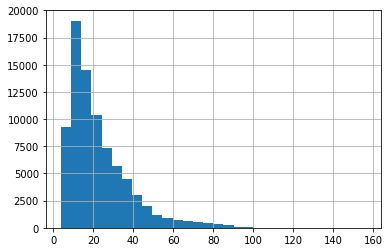

In [ ]:
# get length of all the messages in the train set

X_train, X_test, y_train, y_test = train_test_split(X, dialect, test_size=0.1)
seq_len = [len(tokenizer.encode(i)) for i in X_train]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 200

X_train, X_test, y_train, y_test = train_test_split(X, dialect, test_size=0.1)
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class tweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = tweetDataset(train_encodings, y_train)
test_dataset = tweetDataset(test_encodings, y_test)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]),
 'input_ids': tensor([17028,  1520,   685, 13918,   908,   912,   162,  6067,  4100,   891,
           905,  3305, 14904,   731,   912, 17030, 17029, 17029, 17029, 17029,
         17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029,
         17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029,
         17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029,
         17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029,
         17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 17029, 1702

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=18)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=64,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 81000
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 6330


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,2.280200,1.910939,0.391778,0.390753,0.403809,0.391880
2,1.703100,1.779628,0.440222,0.440660,0.460797,0.441380


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 9000
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
***** Running Evaluation **

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,2.280200,1.910939,0.391778,0.390753,0.403809,0.391880
2,1.703100,1.779628,0.440222,0.440660,0.460797,0.441380
3,1.308700,1.799901,0.455444,0.456001,0.470862,0.454008


Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3000/config.json
Model weights saved in ./results/checkpoint-3000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3500
Configuration saved in ./results/checkpoint-3500/config.json
Model weights saved in ./results/checkpoint-3500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 9000
  Batch size = 32
